### Mini Project
## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|Niek de Visscher | 10667474 | niekdevisscher@hetnet.nl |
| Leon Smits | 10500731 | leonmarijnsmits@gmail.com|
| Daniël van lier | 10639861 | danielvanlier@gmail.com |

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='http://i.imgur.com/wkoLKxY.jpg'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**



## Onderwerp:
200 jaar troonredes

## Inleiding:
8 vorsten
<p>
Verschillende problemen
<p>
Verandering in aanhef
<p>
Taalgebruik verandert met de tijd

### Onderzoeksvraag:
Hoe kunnen we de inhoud/onderwerpen van de troonredes classificeren doormiddel van veel voorkomende woorden?

In [46]:
%matplotlib inline
import pandas as pd
import re
from lxml import etree 
from bz2file import BZ2File
import bz2
import codecs
import xml
import glob
import bs4
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
from pattern.nl import parsetree, pprint
from xml import parsers
import xml.parsers.expat
from xml.etree import cElementTree as ET
from xml.dom.minidom import parse
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

from IPython.display import display, HTML 
from nltk.corpus import stopwords
from nltk import FreqDist

In [34]:
%load_ext disable_autoscroll

<IPython.core.display.Javascript object>

autoscrolling long output is disabled


In [3]:
def parse_troonrede(f):
    '''Read a troonrede file, extract all text and output a list of lists, 
    each element is a paragraph containing a list of sentences,
    each sentence is parsed.'''
    soup= BeautifulSoup(open(f).read())
    ourdiv=soup.find('div', id="post-content") 
    ourpars= [parsetree(p.text, lemmata=True, Relations=True) for p in ourdiv.findAll('p')[:-1]]
    return ourpars

parse_troonrede('test/2007.html')

# this applies step 2 to all troonredes 
def parse_corpus(folder):
    alltroonredes= glob.glob(folder)
    troonredes={}
    for troonrede in alltroonredes:
        key= troonrede.split('\\')[1].replace('.html','')
        value= parse_troonrede(troonrede)
        troonredes[key]=value
    return troonredes


parsedtroonredes= parse_corpus('files/*.html')
print "Troonrede parsing"

Troonrede parsing


In [4]:
def reduce_to_nouns(parsedcorpus):
    nouns_coocuuring_per_paragraph= [list(set([ w.lemma for s in p for w in s.nouns]))  for p in parsedcorpus  ]
    return nouns_coocuuring_per_paragraph

Nounstroonredes= {k:reduce_to_nouns(parsedtroonredes[k]) for k in parsedtroonredes}
print "Enkelvoudige naamwoorden uit troonredes halen"

Enkelvoudige naamwoorden uit troonredes halen


In [341]:
#alle paragrafen per troonrede
x = ''
for k in parsedtroonredes:
    x = k
    
for x in reduce_to_nouns(parsedtroonredes[x]):
    test = 1

In [5]:
def NrWords(L):
    terms=[]
    for p in L:
        terms+=p
    return(len(terms),len(set(terms)))

Nrwords= {y:NrWords(Nounstroonredes[y]) for y in Nounstroonredes}
#print Nrwords

def Vocabulary(Dict):
    terms=[]
    for y in Dict:
        for p in Dict[y]:
            terms+=p
    return Counter(terms)

TroonredeNounsVocab=Vocabulary(Nounstroonredes)
#print TroonredeNounsVocab

In [6]:
print "aantal verschillende enkelvoudige naamwoorden in alle troonredes:",len(TroonredeNounsVocab) 
print "Aantal enkelvoudige naamwoorden die meer dan 1 keer voorkomen:",len([t for t in TroonredeNounsVocab if TroonredeNounsVocab[t] >1])
print "Aantal enkelvoudige naamwoorden in alle troonredes:",sum(TroonredeNounsVocab.values()) 
print "20 Meest vookomende enkelvoudige naamwoorden:"
TroonredeNounsVocab.most_common(20)


aantal verschillende enkelvoudige naamwoorden in alle troonredes: 6728
Aantal enkelvoudige naamwoorden die meer dan 1 keer voorkomen: 3262
Aantal enkelvoudige naamwoorden in alle troonredes: 39090
20 Meest vookomende enkelvoudige naamwoorden:


[(u'regering', 614),
 (u'jaar', 482),
 (u'den', 455),
 (u'land', 331),
 (u'maatregel', 230),
 (u'ontwikkeling', 227),
 (u'nederland', 222),
 (u'belang', 213),
 (u'aandacht', 198),
 (u'wet', 172),
 (u'zorg', 165),
 (u'verbetering', 164),
 (u'staten-generaal', 163),
 (u'toestand', 159),
 (u'beleid', 159),
 (u'edel', 151),
 (u'samenwerking', 148),
 (u'onderwijs', 139),
 (u'deel', 138),
 (u'middeel', 137)]

In [72]:
def pars2cooccurance(L):
    '''L is a list of lists of terms. We output a Counter object with alphabetically 
    ordered pairs of terms as keys and the number of times they co
    occur as values.'''
    pairs = [ t1+'-'+t2 for list in L for t1 in list for t2 in list if t1 < t2]
    return Counter(pairs)


coOccuringNouns= {y:pars2cooccurance(Nounstroonredes[y]) for y in Nounstroonredes}

#Co-occurence and word appearance per 10 years
jaren = 1818
count = 0
#List of list of co-occuring words per 10 years
cooccurper10 = []
these10 = []
#List of lists of words occuring per 10 years
wordsper10 = []
words = []
years = []
while jaren < 2015:
    try:
        these10 += coOccuringNouns[str(jaren)] 
        for p in Nounstroonredes[str(jaren)]:
            words += p
        years.append(jaren)
        jaren += 1
        count += 1
        
    except:
        jaren += 1
        continue
    if count == 10:
        cooccurper10.append(these10)
        wordsper10.append(words)
        count = 0
        these10 = []
        words = []
years.append(jaren)        

#Total co-occurence and word appearance over all files
begin = 1818
totalcooccur = []
totalwords = {}
counter = 0
while begin < 2015:
    try:
        totalcooccur += coOccuringNouns[str(begin)]
        for p in Nounstroonredes[str(begin)]:
            for x in p:
                if x in totalwords:
                    totalwords[x] += 1
                else:
                    totalwords[x] = 1
        begin += 1
    except:
        begin += 1
        continue
    
#How often 2 term have co-occured over all time
totalCounted = Counter(totalcooccur)

print "Meest voorkomende woorden per periode en hun percentuele voorkomen tegenover alle troonredes"

yeardict = {}
freqdict = {}

#for periods of 10 years the 15 most used words
for x in range(0,len(wordsper10)):
    #print "Dit is van periode:",years[int(str(x)+'0')],'-',years[int(str(x)+'0')+10]
    #print ""
    for word in Counter(wordsper10[x]).most_common(15):
        first = totalwords[word[0]]
        second = word[1]
        diff = (float(second)/first)*100
        #print word[0],':', diff
        freqdict[word[0]] = diff
    #print ""
    yeardict[x] = freqdict
    freqdict ={}


Meest voorkomende woorden per periode en hun percentuele voorkomen tegenover alle troonredes


In [77]:
#Here we look at the appearance of words over time, we use all words used in the troonredes since the first, to see when a word
# starts appearing.
display(HTML("Verschijnen van woorden, als een woord meer dan 60% voorkomt sinds het begin van de troonredes zeggen we dat een woord verschijnt"))
count = 0
wordsovertime = []
appearingwordsdict = {}
for x in range(0,len(wordsper10)):
    wordsovertime += wordsper10[x]
    check = Counter(wordsovertime)
    for item in Counter(wordsper10[x]).most_common():
        if item[1] >= 10 and x >= 1:
            word = item[0]
            first = item[1]
            second = check[word]
            diff = (float(first)/second)*100
            if diff > 60:
                #display(HTML("<i>" + "In periode:" + str(years[int(str(x)+'0')])+'-'+str(years[int(str(x)+'0')+10]) + "</i>"))
                #print "In periode:",years[int(str(x)+'0')],'-',years[int(str(x)+'0')+10]
                #print "Wordt het woord: " 
                #display(HTML("<b>" + word + "</b>")) 
                #print "meer dan " + str(int(diff))+ "% gebruikt sinds het begin van de troonredes"
                #print ""
                appearingwordsdict[item[0]] = x

In [99]:
#The co-occurances of appearing words, in what way do these words appear in the troonredes
print "co-occurance van verschijnende woorden, in welke context verschijnen de woorden in de troonredes"
appearingcodict = {}
for word in appearingwordsdict:
    count = 0
    index = appearingwordsdict[word]
    for item in Counter(cooccurper10[index]).most_common():
        if word in item[0]:
            if count < 5:
                if index in appearingcodict:
                    appearingcodict[index] += [item]
                else:
                    appearingcodict[index] = [item]
                #print item
                count += 1
            else:
                break   

co-occurance van verschijnende woorden, in welke context verschijnen de woorden in de troonredes


Dit is van periode: 1829 - 1840


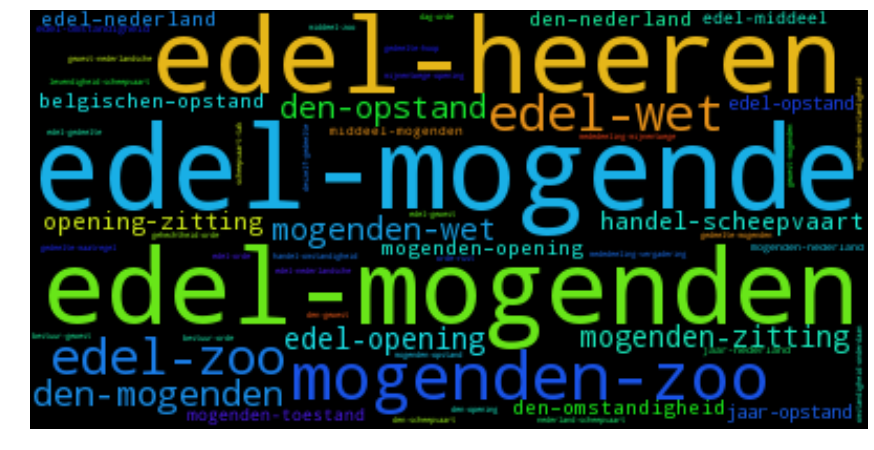

Dit is van periode: 1840 - 1870


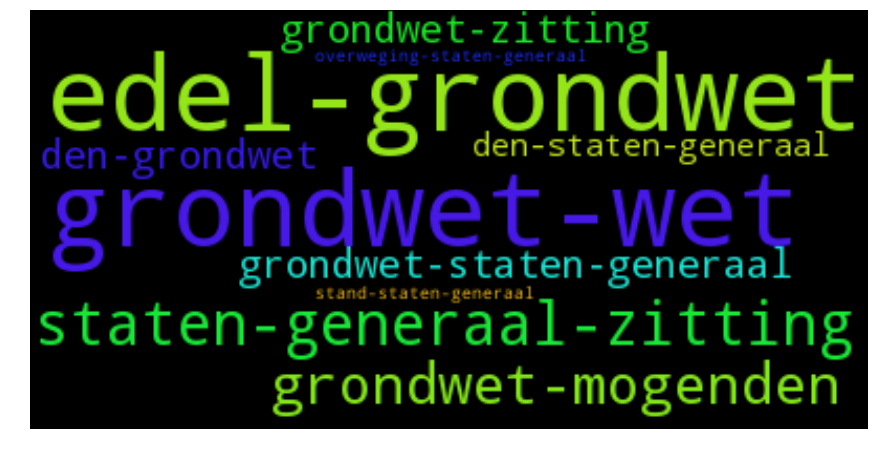

Dit is van periode: 1894 - 1926


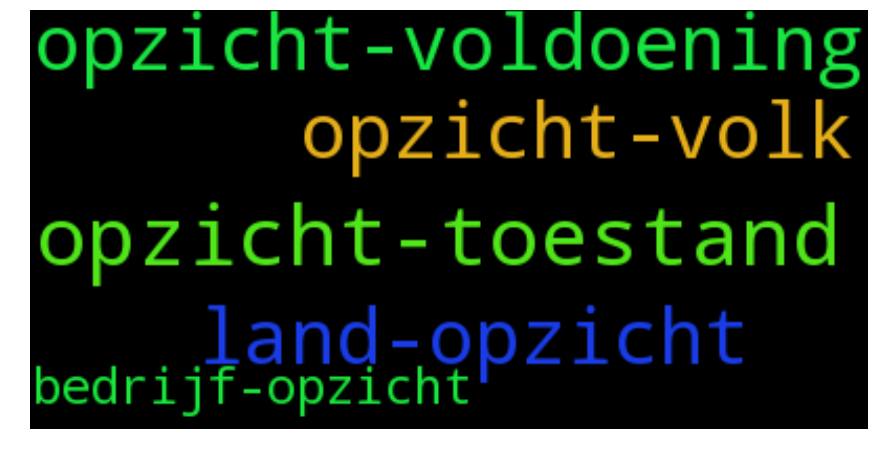

Dit is van periode: 1926 - 1936


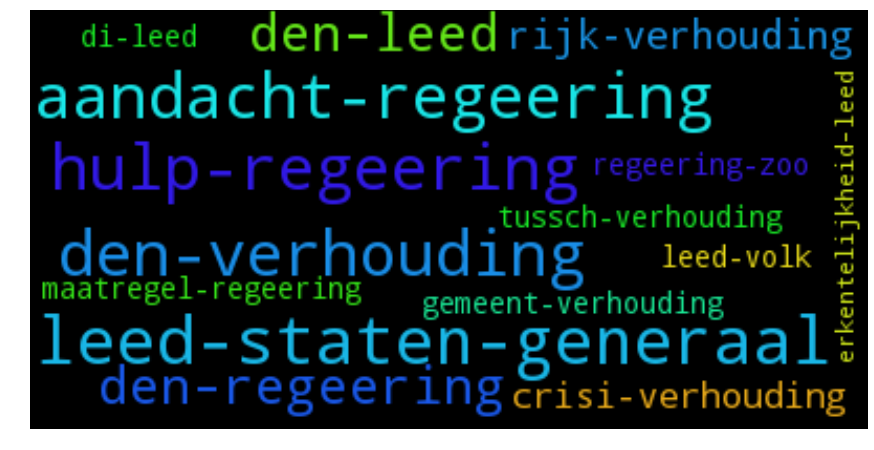

Dit is van periode: 1936 - 1959


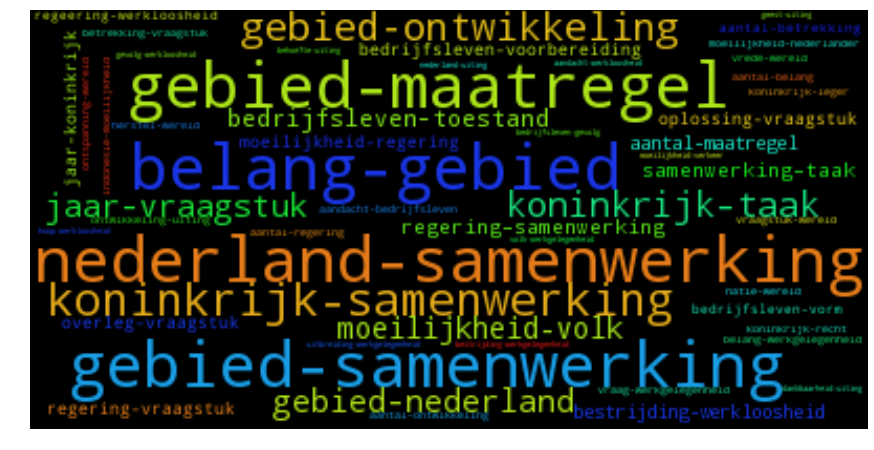

Dit is van periode: 1959 - 1978


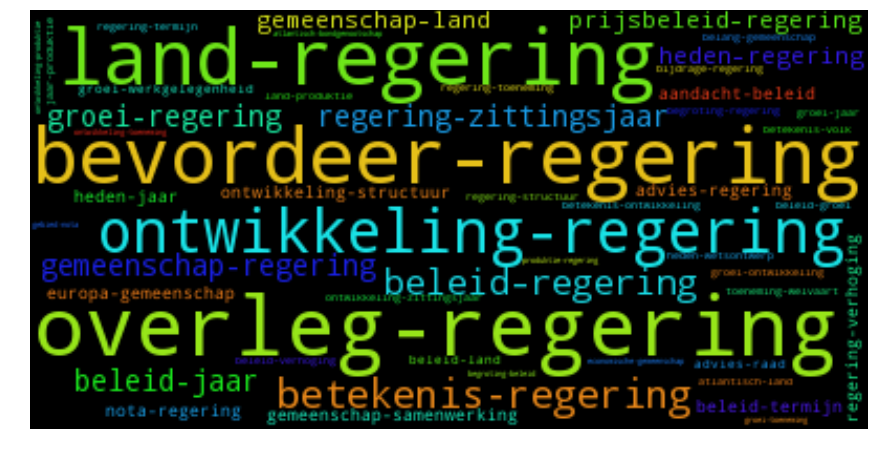

Dit is van periode: 1978 - 1988


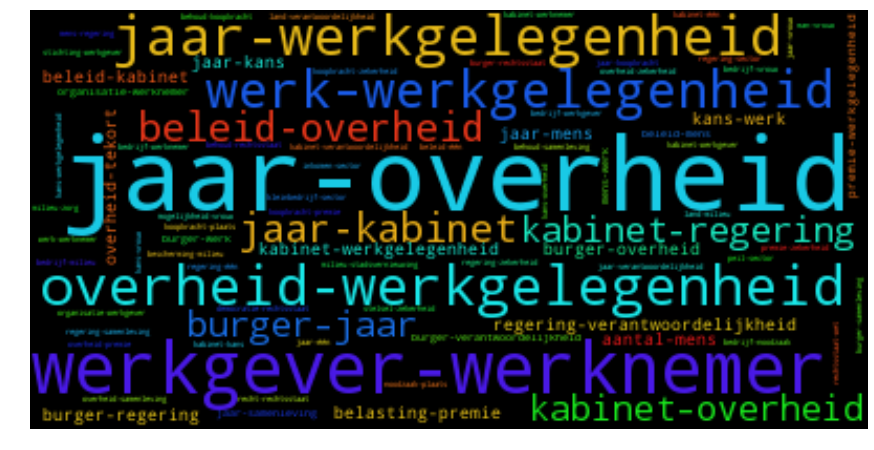

Dit is van periode: 1988 - 2008


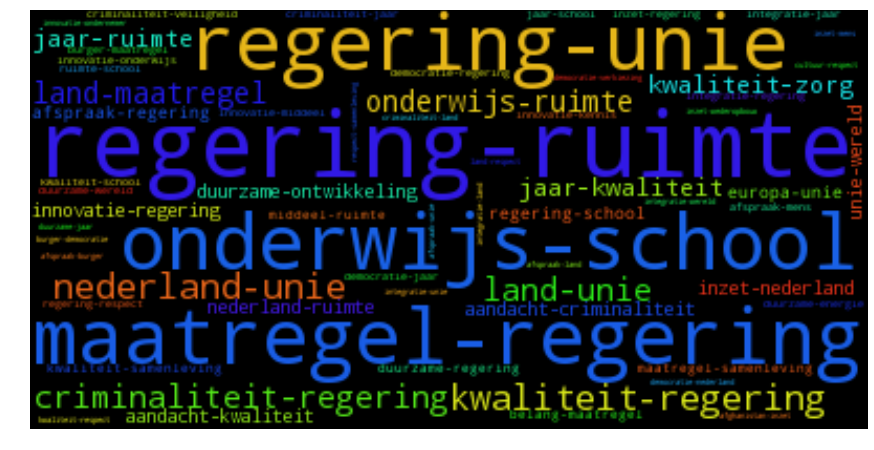

In [97]:
#Here we visualize the words that start to appear per period with their highest co-occurances
print "Visualisatie van verschijnen van woorden en hun hoogste co-occurance in die periode"
for x in appearingcodict:
    freqdict = {}
    print "Dit is van periode:",years[int(str(x)+'0')],'-',years[int(str(x)+'0')+10]
    for item in appearingcodict[x]:
        freqdict[item[0]] = item[1]
    wordcloud = WordCloud().generate_from_frequencies(freqdict.items())
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    #print appearingcodict[x][0]

15 meest voorkomende woorden per 10 troonredes gevisualiseerd
Dit is van periode: 1818 - 1829


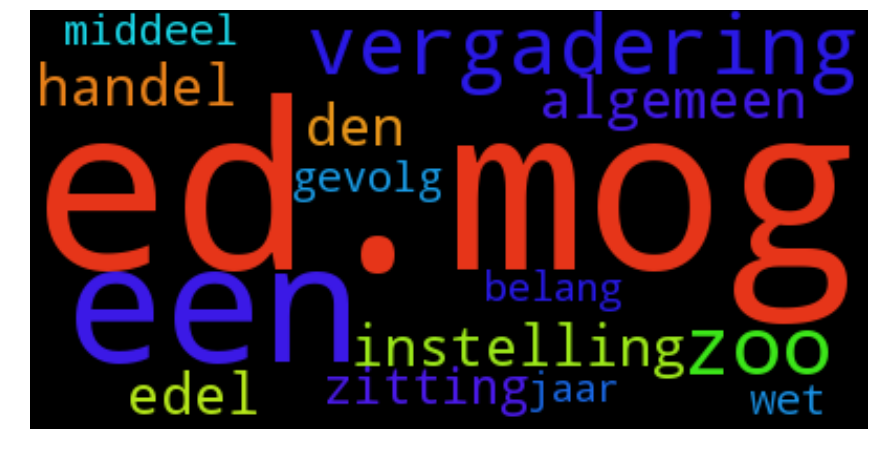

Dit is van periode: 1829 - 1840


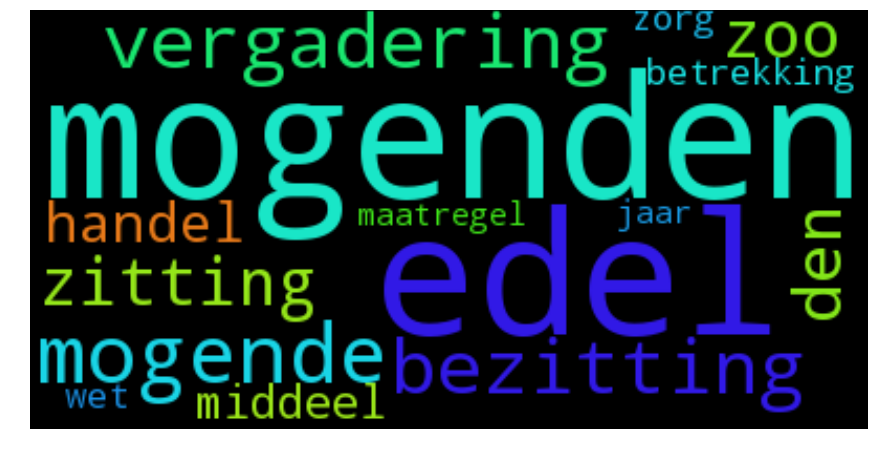

Dit is van periode: 1840 - 1870


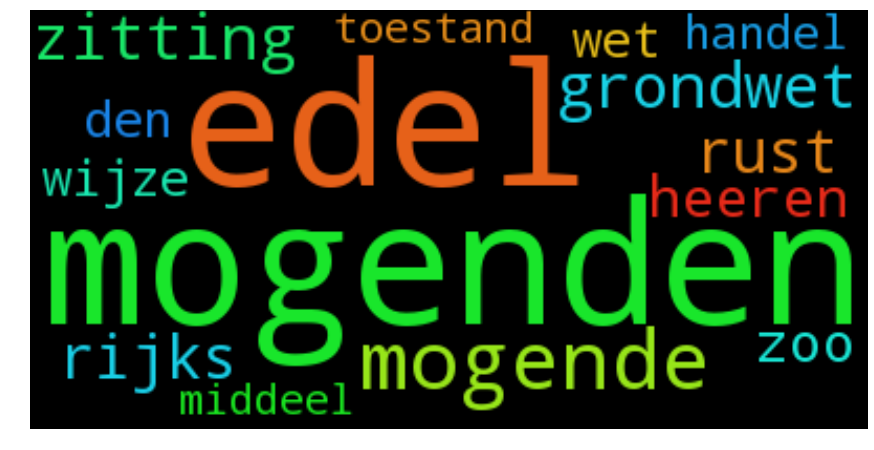

Dit is van periode: 1870 - 1880


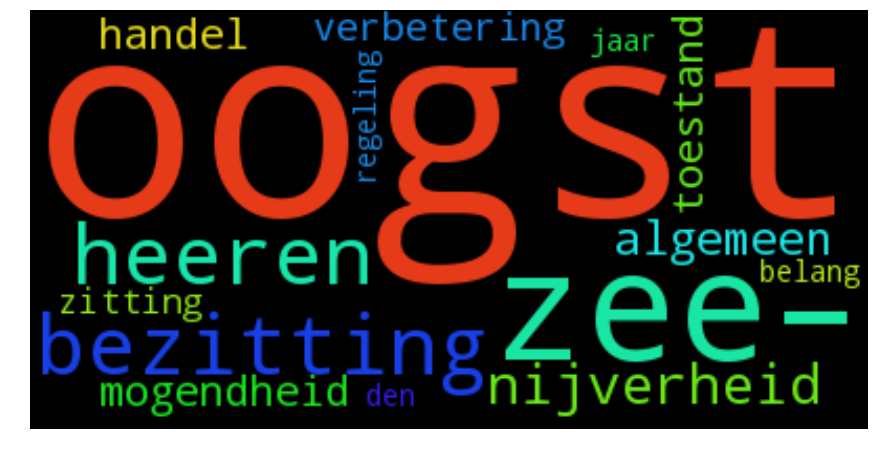

Dit is van periode: 1880 - 1894


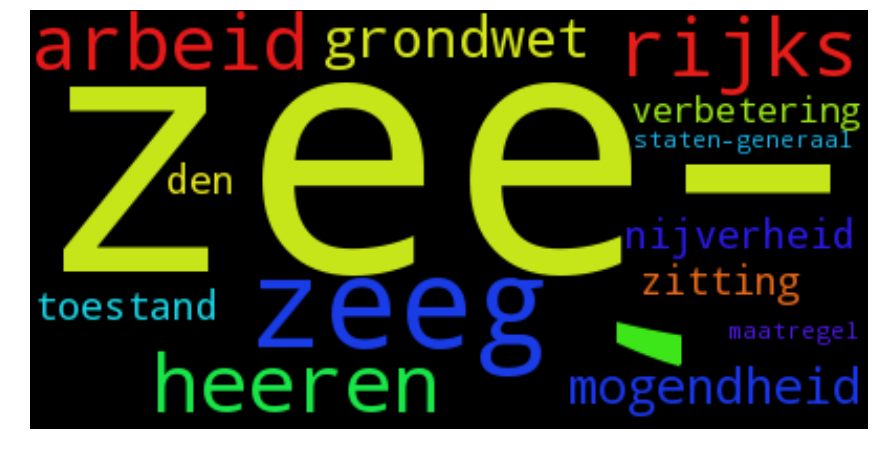

Dit is van periode: 1894 - 1926


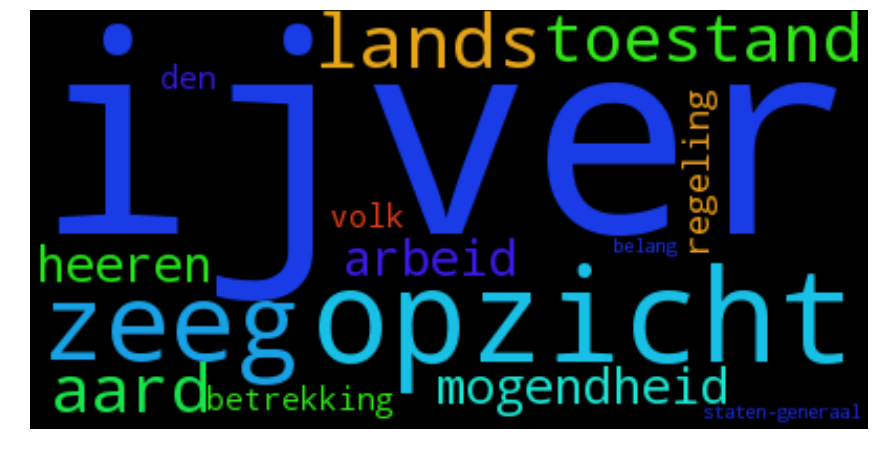

Dit is van periode: 1926 - 1936


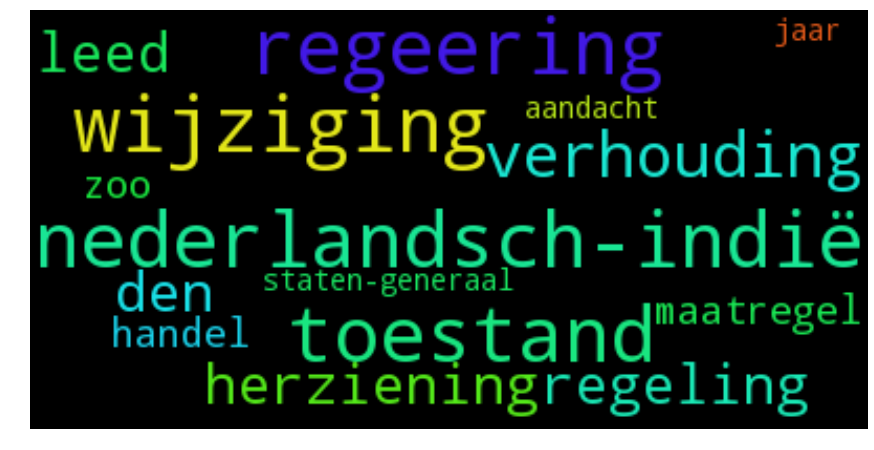

Dit is van periode: 1936 - 1959


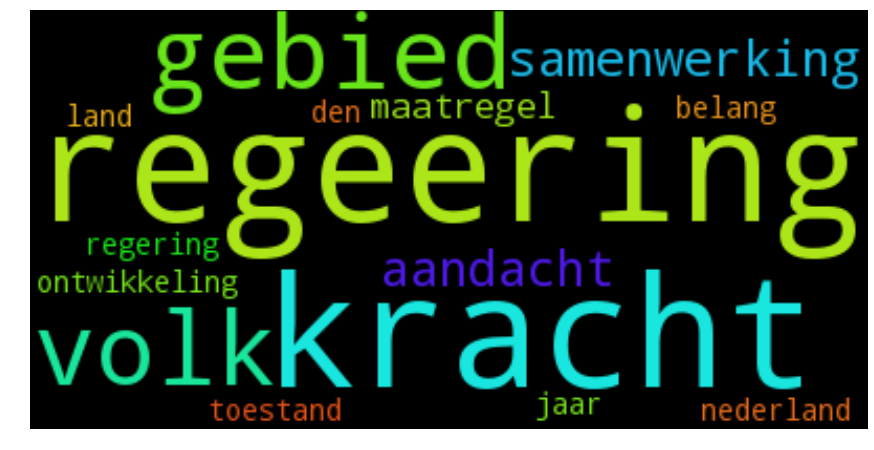

Dit is van periode: 1959 - 1978


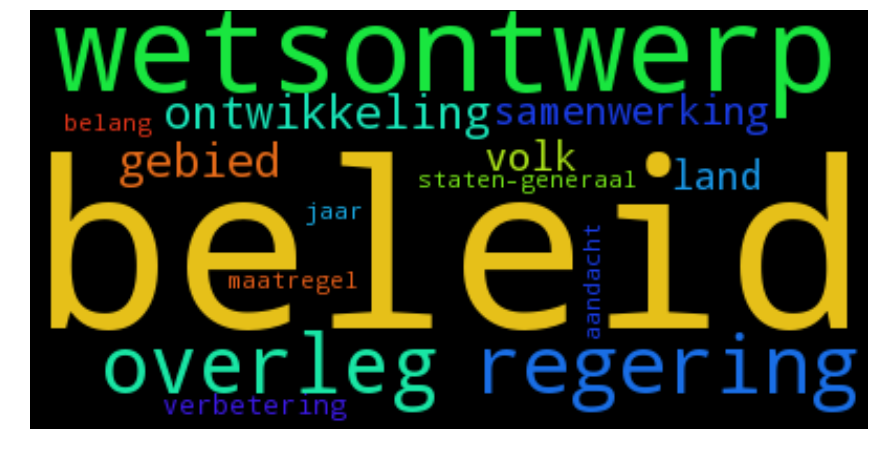

Dit is van periode: 1978 - 1988


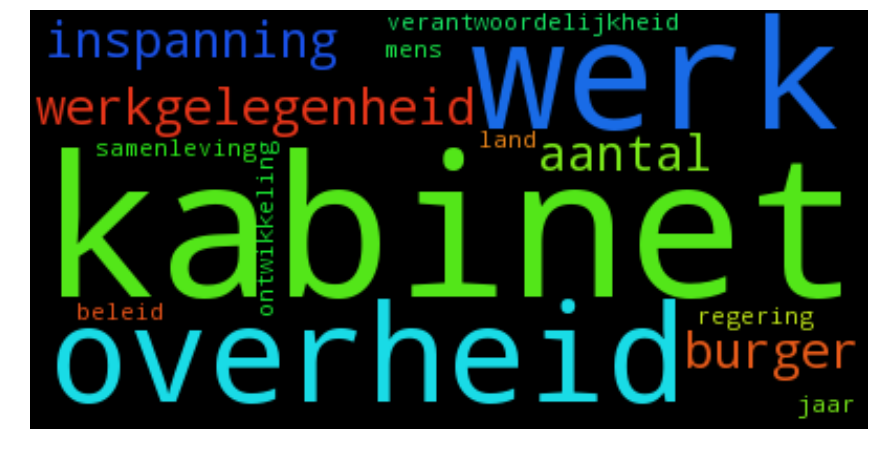

Dit is van periode: 1988 - 2008


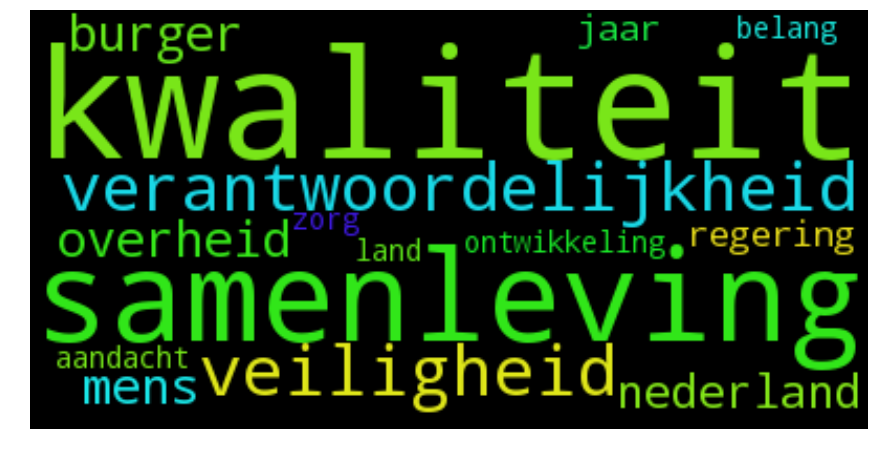

In [85]:
#15 most common words per 10 troonredes visualized
print "15 meest voorkomende woorden per 10 troonredes gevisualiseerd"
for x in yeardict:
    print "Dit is van periode:",years[int(str(x)+'0')],'-',years[int(str(x)+'0')+10]
    wordcloud = WordCloud().generate_from_frequencies(yeardict[x].items())
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Links data vanuit 5 meest voorkomende woorden en rechts de 25 meest voorkomende co-occurances per 10 jaar
data over tijdperiode: 1818 - 1829
De 5 meest voorkomende woorden in deze periode: den , jaar , ed.mog , zoo , vergadering


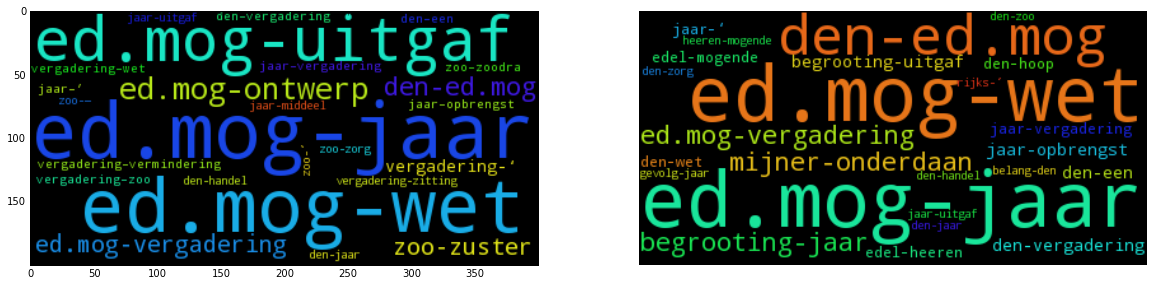

data over tijdperiode: 1829 - 1840
De 5 meest voorkomende woorden in deze periode: den , edel , mogenden , zoo , jaar


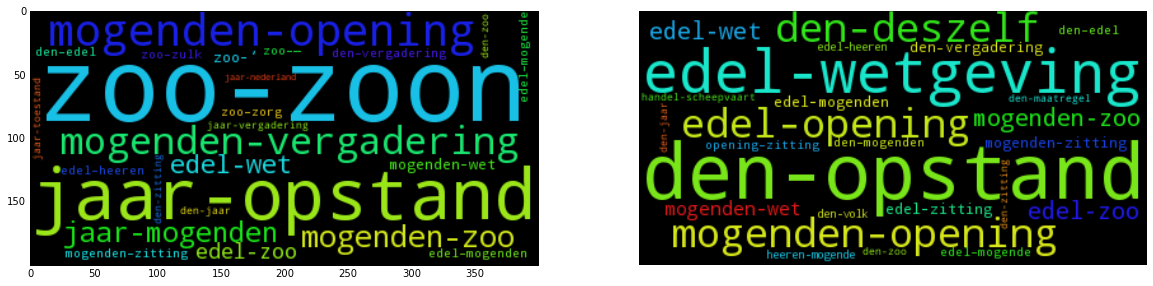

data over tijdperiode: 1840 - 1870
De 5 meest voorkomende woorden in deze periode: den , edel , mogenden , zitting , wet


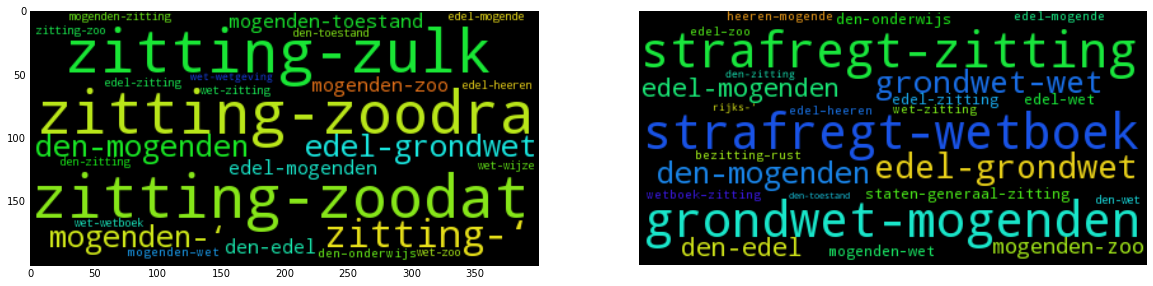

data over tijdperiode: 1870 - 1880
De 5 meest voorkomende woorden in deze periode: den , toestand , verbetering , heeren , handel


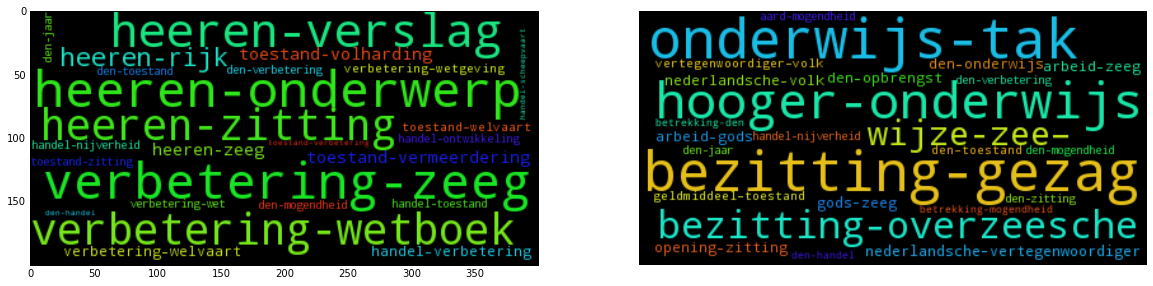

data over tijdperiode: 1880 - 1894
De 5 meest voorkomende woorden in deze periode: den , toestand , ‘ , heeren , arbeid


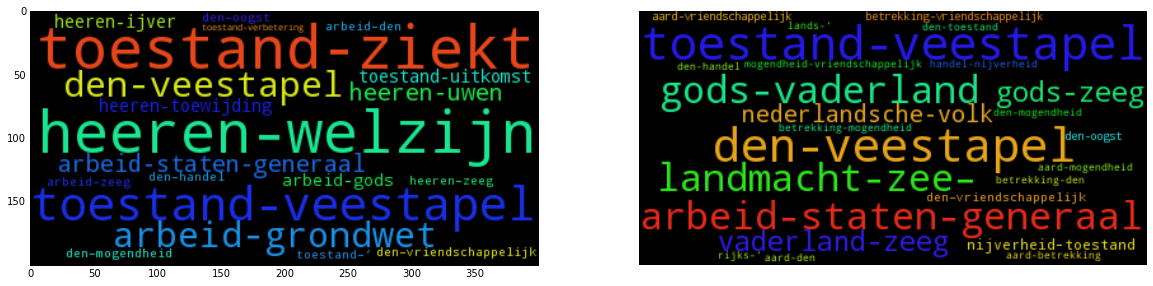

data over tijdperiode: 1894 - 1926
De 5 meest voorkomende woorden in deze periode: den , toestand , arbeid , mogendheid , regeling


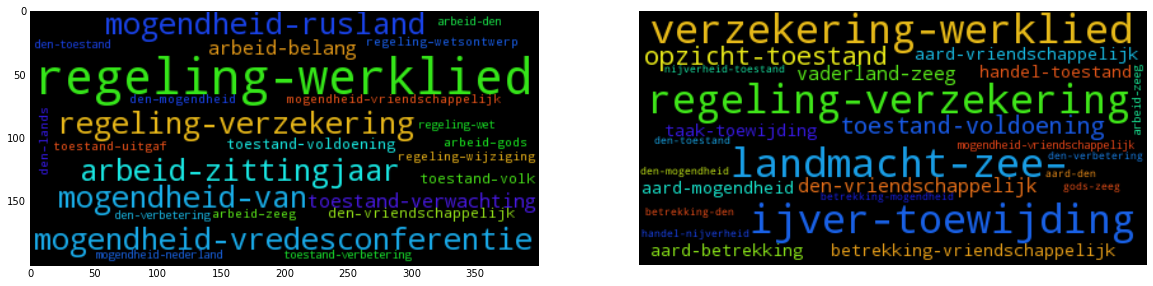

data over tijdperiode: 1926 - 1936
De 5 meest voorkomende woorden in deze periode: den , toestand , maatregel , regeering , jaar


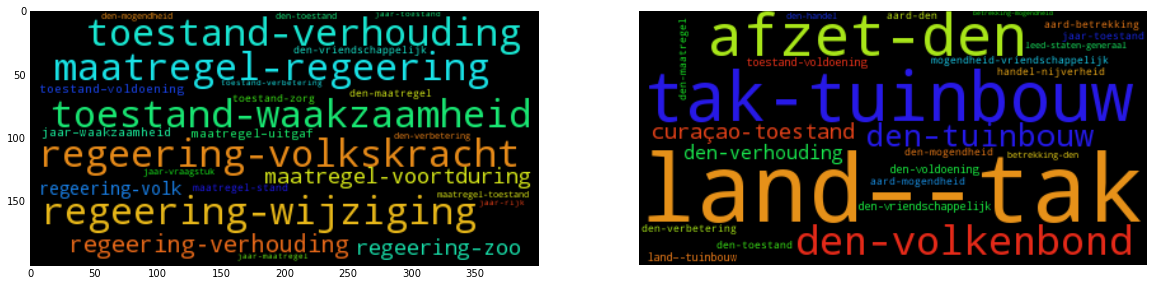

data over tijdperiode: 1936 - 1959
De 5 meest voorkomende woorden in deze periode: den , regering , jaar , maatregel , ontwikkeling


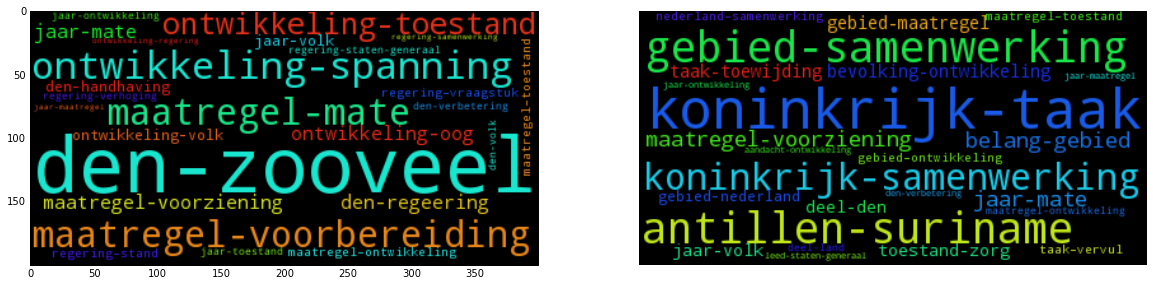

data over tijdperiode: 1959 - 1978
De 5 meest voorkomende woorden in deze periode: regering , land , ontwikkeling , jaar , beleid


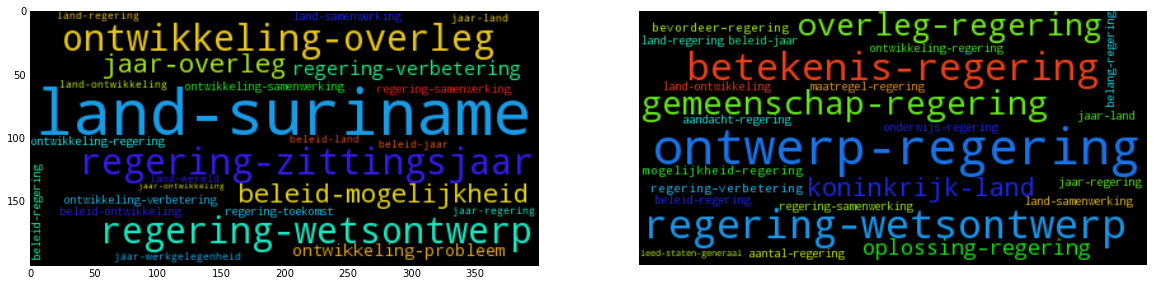

data over tijdperiode: 1978 - 1988
De 5 meest voorkomende woorden in deze periode: regering , jaar , land , overheid , burger


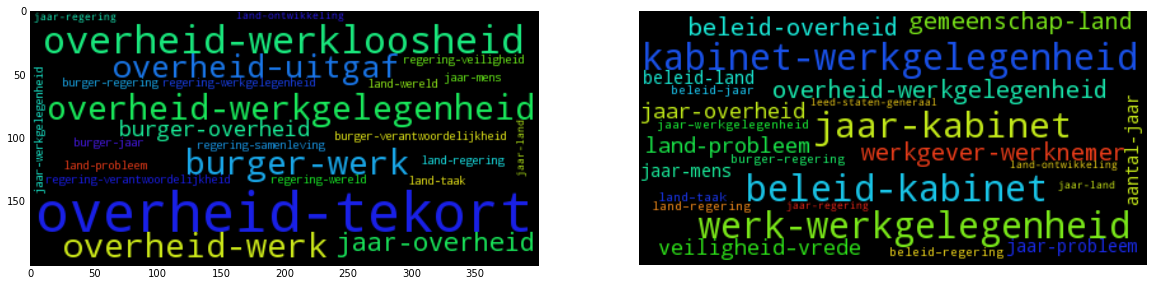

data over tijdperiode: 1988 - 2008
De 5 meest voorkomende woorden in deze periode: regering , jaar , land , nederland , samenleving


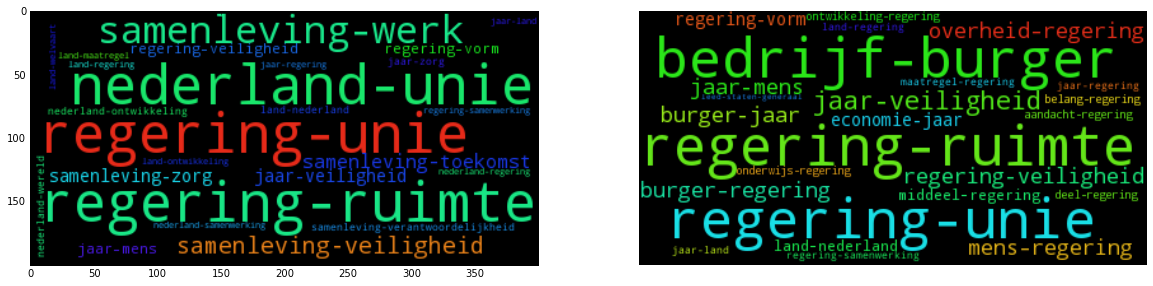

In [57]:
#Data over all periods of 10 troonredes, this will show the difference between using the most common words and
# most co-occuring word combinations
print "Links data vanuit 5 meest voorkomende woorden en rechts de 25 meest voorkomende co-occurances per 10 jaar"
for period in range(0,len(wordsper10)):
    count = 0
    worddata = {}
    yearwords = ""
    for data in Counter(wordsper10[period]).most_common(5):
        yearwords += " , "+data[0]
        test = []
        for x in Counter(cooccurper10[period]).most_common():
            if count != 5:
                if bool(re.match('\\b'+data[0]+'\\b',x[0])):
                    test.append(x)
                    count += 1
            else:
                count = 0
                for y in test:
                    first = y[1]
                    second = totalCounted[y[0]]
                    diff = float(first)/second
                    worddata[y[0]] = diff
                break
    cooccurdata = {}
    for z in Counter(cooccurper10[period]).most_common(25):
        first = z[1]
        second = totalCounted[z[0]]
        diff = float(first)/second
        cooccurdata[z[0]] = diff
    cooccurcloud = WordCloud().generate_from_frequencies(cooccurdata.items())
    #print yearwords
    print "data over tijdperiode:", years[int(str(period)+'0')],'-',years[int(str(period)+'0')+10]
    print "De 5 meest voorkomende woorden in deze periode:", yearwords[3:]
    plt.figure(figsize=(20, 10))
    wordcloud = WordCloud().generate_from_frequencies(worddata.items())
    plt.subplot(1,2,1)
    plt.imshow(wordcloud)
    plt.subplot(1,2,2)
    plt.imshow(cooccurcloud)
    plt.axis("off")
    plt.show()

In [18]:
print "Dataframe van co-occurences over alle troonredes:"
#For the total co-occurence a dataframe
coOccurenceDict = {}
for x in totalCounted.most_common():
    coOccurenceDict[x[0]] = x[1]
    
dataframe = pd.DataFrame(coOccurenceDict.items(), columns=['combination', 'occurence'])
dataframe.sort_values('occurence',ascending=False).head(20)

Dataframe van co-occurences over alle troonredes:


combination  occurence
32479    leed-staten-generaal         61
162606  betrekking-mogendheid         50
56518            den-toestand         48
261844         jaar-maatregel         44
229452               den-jaar         43
163291          jaar-regering         42
164548             den-handel         39
143138         betrekking-den         39
108356              jaar-land         39
230159          land-regering         39
79569          den-mogendheid         39
27878      maatregel-regering         36
231029      handel-nijverheid         35
173675      land-ontwikkeling         34
252170      jaar-ontwikkeling         34
118900        beleid-regering         34
212112          den-maatregel         34
228156     onderwijs-regering         32
18237         belang-regering         32
35016             jaar-uitgaf         32

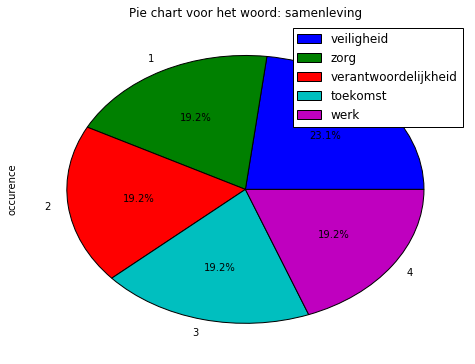

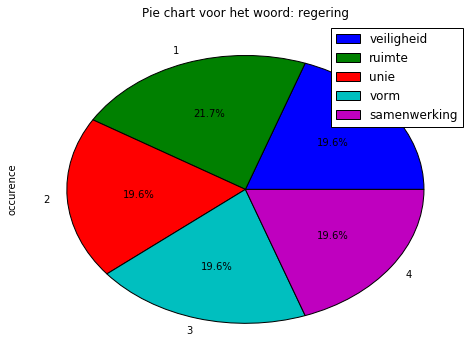

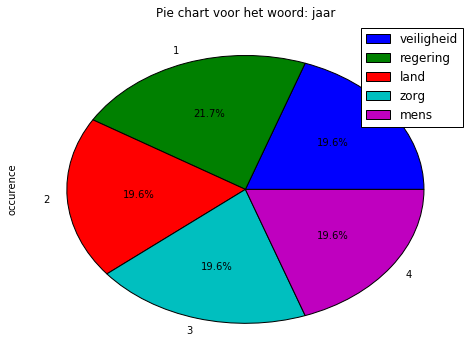

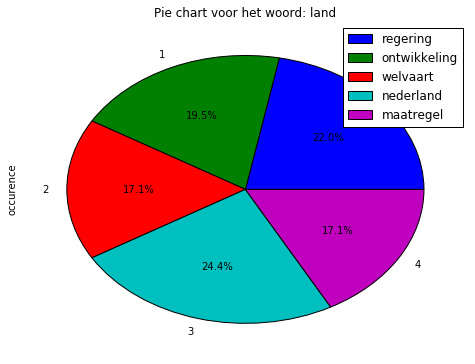

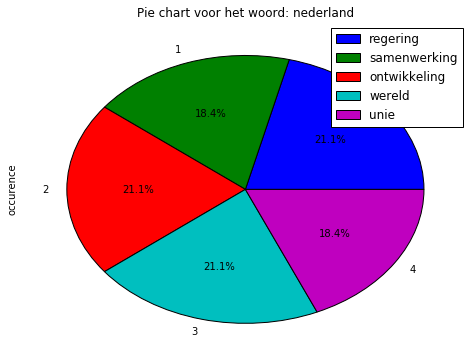

In [13]:
#Pie charts with the percentage the most common co-occuring words occur with a given word
for x in testing:
    testdict = {}
    for y in testing[x]:
        word = y[0].split('-')[1]
        testdict[word] = y[1]
    df = pd.DataFrame(testdict.items(), columns=['word', 'occurence'])
    title="Pie chart voor het woord: "+x
    plt = df.plot(kind='pie',y="occurence",x="word",figsize={6,8},title=title,autopct='%1.1f%%')
    labels = df["word"]
    plt.legend(labels)

## Conclusie:

Duidelijk aangegeven welke woorden het belangrijkst waren.
<p>
Verschuiving in inhoud van troonredes: vergadering ---> samenlevingsgericht
<p>
Niet elke periode is volledig representatief vanwege missende data.